In [ ]:
Theoritical Questions



### **KNN (K-Nearest Neighbors)**

1. **What is K-Nearest Neighbors (KNN) and how does it work?**  
   KNN is a **lazy, instance-based learning algorithm** used for classification and regression. It works by:
   - Calculating the distance between a query point and all data points.
   - Selecting the **K** nearest neighbors.
   - Predicting the label (classification) or value (regression) based on these neighbors (e.g., majority vote or average).

2. **Difference between KNN Classification and KNN Regression?**  
   - **Classification**: Predicts a class label using **majority voting** among neighbors.  
   - **Regression**: Predicts a **continuous value** using **average (or weighted average)** of neighbors’ values.

3. **What is the role of the distance metric in KNN?**  
   It determines **how "closeness" is measured**. Common metrics:
   - **Euclidean distance** (default)
   - Manhattan distance
   - Minkowski
   - Cosine similarity (for text/angle-based data)

4. **What is the Curse of Dimensionality in KNN?**  
   As dimensions increase:
   - Data points become **equidistant**, reducing the meaning of “nearest”.
   - **Sparsity** makes it hard to find truly similar neighbors.
   - Model performance **degrades** in high dimensions without dimensionality reduction.

5. **How can we choose the best value of K in KNN?**  
   - Use **cross-validation** to find optimal **K**.
   - Low K → **Overfitting**, High K → **Underfitting**.
   - Often try odd values (to avoid ties) and plot **error vs. K**.

6. **What are KD Tree and Ball Tree in KNN?**  
   They are **data structures** used to speed up neighbor search:
   - **KD Tree**: Binary tree that splits space along data axes.
   - **Ball Tree**: Divides space into hyperspheres (balls), better for **non-axis-aligned data**.

7. **When should you use KD Tree vs. Ball Tree?**  
   - **KD Tree**: Best for **low-dimensional**, axis-aligned data.
   - **Ball Tree**: Better for **higher-dimensional**, non-uniform data.

8. **What are the disadvantages of KNN?**  
   - **Slow at inference** (has to search entire dataset).
   - Sensitive to **irrelevant/noisy features**.
   - Struggles with **high-dimensional** data.
   - Needs **feature scaling**.

9. **How does feature scaling affect KNN?**  
   - Features with larger scales **dominate** distance calculations.
   - Use **Normalization (Min-Max)** or **Standardization (Z-score)** to balance influence.

---

### **PCA (Principal Component Analysis)**

10. **What is PCA (Principal Component Analysis)?**  
    PCA is an **unsupervised dimensionality reduction** technique that projects data to a lower-dimensional space while preserving as much **variance** as possible.

11. **How does PCA work?**  
    - Mean-center the data.
    - Compute the **covariance matrix**.
    - Extract **eigenvectors and eigenvalues**.
    - Project data onto **top-k eigenvectors** (principal components).

12. **Geometric intuition behind PCA?**  
    PCA finds **new axes (principal components)** that:
    - Are **orthogonal** (uncorrelated).
    - Capture the directions of **maximum variance** in the data.
    - Reduces dimensionality while preserving data spread.

13. **Difference between Feature Selection and Feature Extraction?**  
    - **Feature Selection**: Chooses a **subset** of original features.
    - **Feature Extraction**: **Transforms** original features into new ones (e.g., PCA).

14. **What are Eigenvalues and Eigenvectors in PCA?**  
    - **Eigenvectors**: Directions of maximum variance (principal axes).
    - **Eigenvalues**: Amount of variance captured by each eigenvector.
    - Higher eigenvalue = more “important” component.

15. **How do you decide the number of components to keep in PCA?**  
    - **Scree Plot**: Look for the “elbow”.
    - **Explained variance threshold** (e.g., 95% of total variance).
    - Use **cumulative explained variance plot**.

16. **Can PCA be used for classification?**  
    Indirectly, yes:
    - PCA is **unsupervised** but can improve **classification** by reducing noise/dimensionality.
    - Apply PCA → then use classifiers like KNN, SVM, etc.

17. **What are the limitations of PCA?**  
    - Assumes **linearity**.
    - Sensitive to **scaling** and **outliers**.
    - Doesn’t use **class labels** (unsupervised).
    - Can be **hard to interpret** transformed features.

18. **How do KNN and PCA complement each other?**  
    - PCA helps reduce **dimensionality**, which addresses KNN's **curse of dimensionality**.
    - PCA removes noise and correlated features, improving **KNN accuracy and speed**.

19. **How does KNN handle missing values in a dataset?**  
    - KNN doesn’t inherently handle missing data.
    - Options:
      - Impute missing values using **KNN imputation**.
      - Remove rows/columns with missing values.
      - Use distance metrics that **ignore NaNs**.


### **20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?**

| **Aspect**                     | **PCA (Principal Component Analysis)**             | **LDA (Linear Discriminant Analysis)**            |
|-------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Type**                      | **Unsupervised** learning                         | **Supervised** learning                          |
| **Objective**                 | Maximize **overall variance** in the data         | Maximize **class separability** (discrimination) |
| **Uses class labels?**        | No                                              | Yes                                            |
| **Projection directions**     | Eigenvectors of the **covariance matrix**         | Eigenvectors of the **between-class scatter matrix** |
| **Best suited for**           | Dimensionality reduction in **general tasks**     | Dimensionality reduction for **classification**  |
| **Output components**         | Up to **n_features**                              | Up to **n_classes - 1**                          |
| **Focus**                     | Data **structure and spread**                     | Data **class separability**                     |
| **Example use case**          | Preprocessing before clustering or any model      | Preprocessing before classification (e.g., KNN, SVM) |

---

### **Summary:**
- **PCA** looks for **directions of maximum variance**, regardless of class labels.
- **LDA** looks for directions that **best separate the classes**.



Practical Questions

In [3]:
#21 Train a KNN Classifier on the iris dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

#22 Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=10, random_state=42) # Changed variable names to X_reg, y_reg
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42) # Changed variable names

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg) # Using regression data
y_pred_reg = knn_reg.predict(X_test_reg) # Using regression data

mse = mean_squared_error(y_test_reg, y_pred_reg) # Using regression data
print(f"Mean Squared Error: {mse:.2f}")

#23 Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_train, y_train)  # Using classification data (iris)
    y_pred = knn.predict(X_test) # Using classification data (iris)
    acc = accuracy_score(y_test, y_pred) # Using classification data (iris)
    print(f"{metric.capitalize()} Distance Accuracy: {acc:.2f}")


Model Accuracy: 1.00
Mean Squared Error: 275.95
Euclidean Distance Accuracy: 1.00
Manhattan Distance Accuracy: 1.00


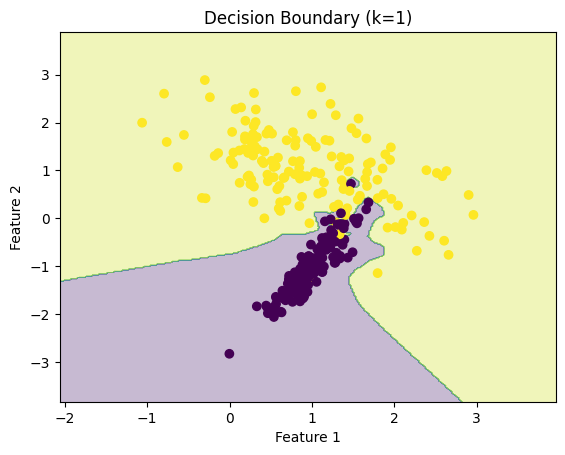

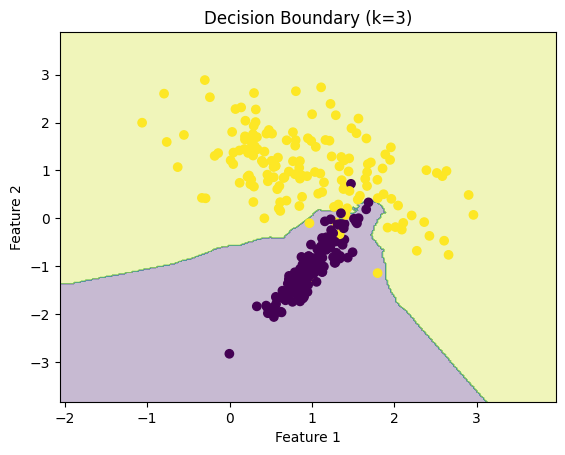

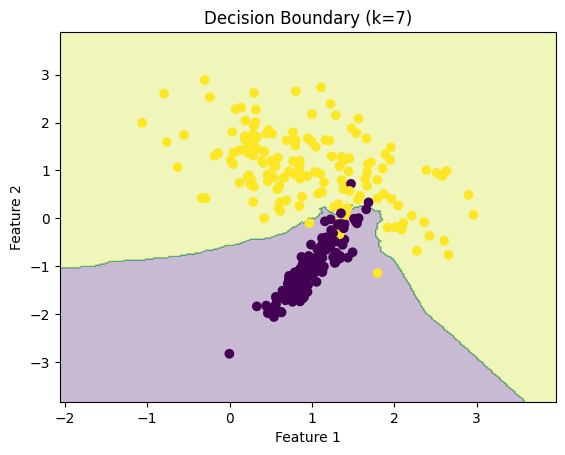

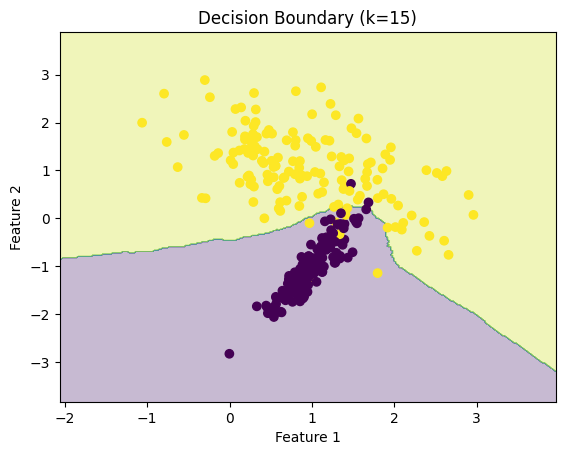

Accuracy without Scaling: 1.00
Accuracy with Scaling: 1.00


In [4]:
#24  Train a KNN Classifier with different values of K and visualize decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

def plot_decision_boundary(X, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f"Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

for k in [1, 3, 7, 15]:
    plot_decision_boundary(X, y, k)
#25 Apply Feature Scaling before training a KNN model and compare results with unscaled data.
from sklearn.preprocessing import StandardScaler

# Without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without Scaling: {acc_unscaled:.2f}")
print(f"Accuracy with Scaling: {acc_scaled:.2f}")


In [5]:
#26 Train a PCA model on synthetic data and print the explained variance ratio for each component.

from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate synthetic data
X, _ = make_classification(n_samples=300, n_features=5, random_state=42)

# Fit PCA
pca = PCA(n_components=5)
pca.fit(X)

# Explained Variance Ratio
print("Explained Variance Ratio per Component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {ratio:.4f}")


Explained Variance Ratio per Component:
Component 1: 0.5942
Component 2: 0.2513
Component 3: 0.1545
Component 4: 0.0000
Component 5: 0.0000


In [6]:
#27 Apply PCA before training a KNN Classifier and compare accuracy with and without PCA,
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Without PCA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc_no_pca = accuracy_score(y_test, knn.predict(X_test))

# With PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print(f"Accuracy without PCA: {acc_no_pca:.2f}")
print(f"Accuracy with PCA: {acc_pca:.2f}")


Accuracy without PCA: 1.00
Accuracy with PCA: 0.96


In [7]:
#28 Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': list(range(1, 11)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
Best Accuracy: 0.9666666666666668


In [8]:
#29 Train a KNN Classifier and check the number of misclassified samples.

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

misclassified = (y_pred != y_test).sum()
print(f"Number of Misclassified Samples: {misclassified}")


Number of Misclassified Samples: 0


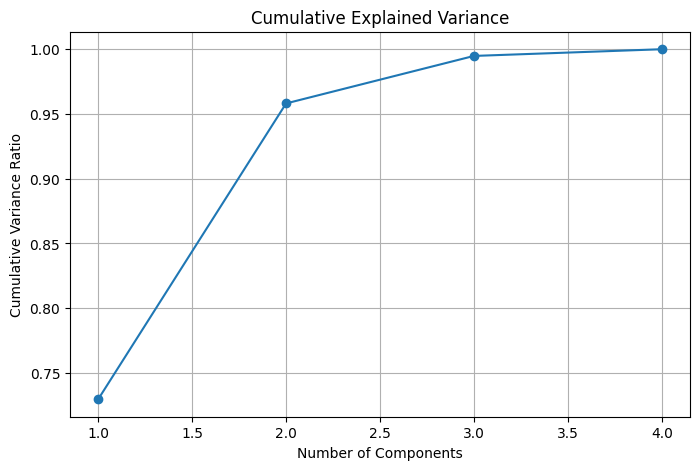

In [9]:
#30 Train a PCA model and visualize the cumulative explained variance. 
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)
plt.show()


In [10]:
#31  Train a KNN Classifier using different values of the weights parameter (uniform vis. distarice) and compare accuracy.
weights_options = ['uniform', 'distance']

for weight in weights_options:
    knn = KNeighborsClassifier(n_neighbors=5, weights=weight)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with weights='{weight}': {acc:.2f}")


Accuracy with weights='uniform': 1.00
Accuracy with weights='distance': 1.00


In [11]:
#32 Train a KNN Regressar and analyze the effect of different K values on performance
from sklearn.metrics import mean_squared_error

X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("K - MSE")
for k in [1, 3, 5, 7, 10, 15]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_r, y_train_r)
    y_pred_r = knn_reg.predict(X_test_r)
    mse = mean_squared_error(y_test_r, y_pred_r)
    print(f"{k} - {mse:.2f}")


K - MSE
1 - 566.25
3 - 397.60
5 - 437.35
7 - 442.66
10 - 469.50
15 - 558.08


In [12]:
#33  Implement KNN imputation for handling missing values in a dotaset.
import numpy as np
from sklearn.impute import KNNImputer

# Create synthetic data with missing values
X_missing = X.copy()
rng = np.random.default_rng(42)
missing_mask = rng.random(X_missing.shape) < 0.1
X_missing[missing_mask] = np.nan

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)

print("Missing values before:", np.isnan(X_missing).sum())
print("Missing values after:", np.isnan(X_imputed).sum())


Missing values before: 55
Missing values after: 0


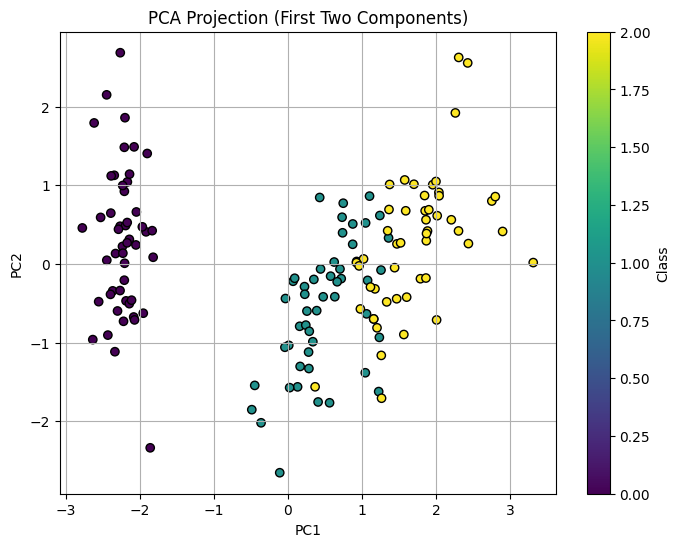

In [13]:
#34 Train a PCA model and visualize the data projection onto the first two principal components.

X_2D = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("PCA Projection (First Two Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


In [14]:
#35 Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.
algorithms = ['kd_tree', 'ball_tree']

for algo in algorithms:
    knn = KNeighborsClassifier(algorithm=algo, n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{algo.upper()} Accuracy: {acc:.2f}")


KD_TREE Accuracy: 1.00
BALL_TREE Accuracy: 1.00


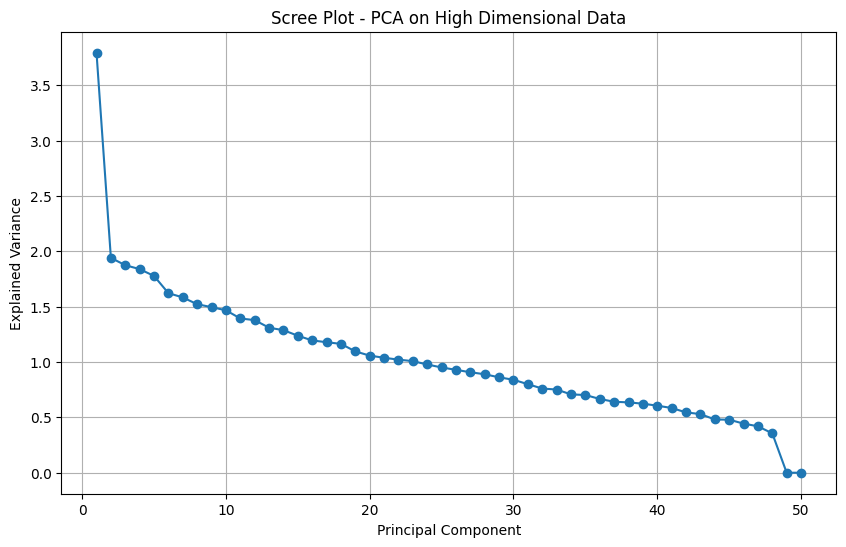

In [15]:
#36 Train a PCA model on a high-dimensional dataset and visualize the Scree plot,

from sklearn.datasets import make_classification

# High-dimensional synthetic data
X_hd, _ = make_classification(n_samples=300, n_features=50, random_state=42)

# PCA
pca_hd = PCA()
pca_hd.fit(X_hd)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_hd.explained_variance_)+1), pca_hd.explained_variance_, marker='o')
plt.title("Scree Plot - PCA on High Dimensional Data")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()


In [16]:
#37 Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
#38 Train a PCA model and analyze the effect of different numbers of components on accuracy.

for n in [1, 2, 3, 4]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train_pca)
    acc = accuracy_score(y_test_pca, knn.predict(X_test_pca))
    print(f"Accuracy with {n} PCA components: {acc:.2f}")


Accuracy with 1 PCA components: 0.91
Accuracy with 2 PCA components: 0.96
Accuracy with 3 PCA components: 1.00
Accuracy with 4 PCA components: 1.00


In [18]:
#39 Train a KNN Classifier with different leaf size values and compare accuracy.
leaf_sizes = [10, 20, 30, 50]

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Leaf Size = {leaf}: Accuracy = {acc:.2f}")


Leaf Size = 10: Accuracy = 1.00
Leaf Size = 20: Accuracy = 1.00
Leaf Size = 30: Accuracy = 1.00
Leaf Size = 50: Accuracy = 1.00


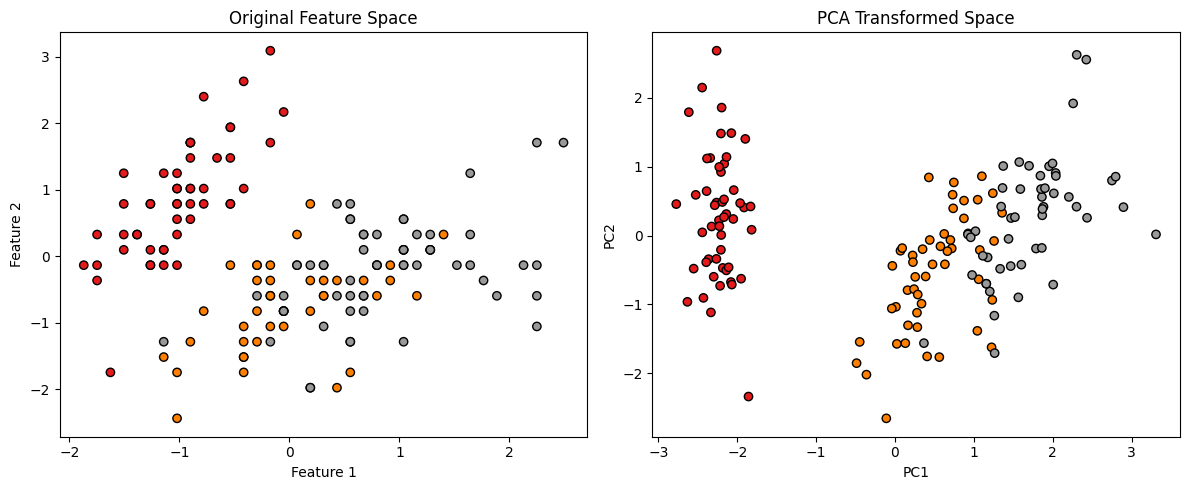

In [19]:
#40 Train a PCA model and visualize how data points are transformed before and after PCA
X_2D_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

# Original space
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='Set1', edgecolor='k')
plt.title("Original Feature Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# PCA space
plt.subplot(1, 2, 2)
plt.scatter(X_2D_pca[:, 0], X_2D_pca[:, 1], c=y, cmap='Set1', edgecolor='k')
plt.title("PCA Transformed Space")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


In [20]:
#41 Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.
from sklearn.datasets import load_wine

# Load data
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Standardize
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X_wine), y_wine, test_size=0.3, random_state=42)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Report
print("Classification Report (Wine Dataset):\n")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report (Wine Dataset):

              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [21]:
#42 Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.
metrics = ['euclidean', 'manhattan']

for metric in metrics:
    knn_reg = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg.fit(X_train_r, y_train_r)
    y_pred_r = knn_reg.predict(X_test_r)
    mse = mean_squared_error(y_test_r, y_pred_r)
    print(f"{metric.capitalize()} MSE: {mse:.2f}")


Euclidean MSE: 437.35
Manhattan MSE: 437.35


In [28]:
#43 Train a KNN Classifier and evaluate using ROC-AUC score.
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# For multiclass, use binarized labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Correct the train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42) # use X and y_bin for the same split

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Assuming y_train is still the original target variable
y_proba = knn.predict_proba(X_test)


roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
print(f"ROC-AUC Score (Multiclass): {roc_auc:.2f}")

ROC-AUC Score (Multiclass): 1.00


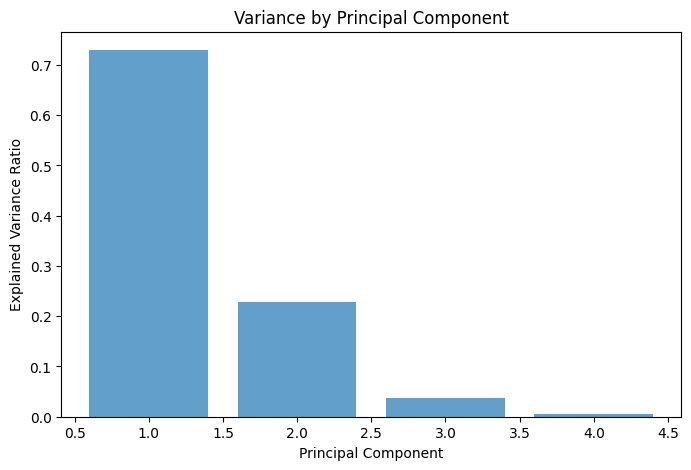

In [23]:
#44 Train a PCA model and visualize the variance captured by each principal component.
pca = PCA().fit(X_scaled)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance by Principal Component')
plt.show()


In [24]:
#45 Train a KNN Classifier and perform feature selection before training.
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 2 features
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy with Feature Selection (Top 2): {acc:.2f}")


Accuracy with Feature Selection (Top 2): 1.00


In [25]:
#46 Train a PCA model and visualize the data reconstruction error after reducing dimensions.

# Fit PCA and transform
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Inverse transform to reconstruct
X_reconstructed = pca.inverse_transform(X_reduced)

# Reconstruction Error
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")


Reconstruction Error: 0.0419


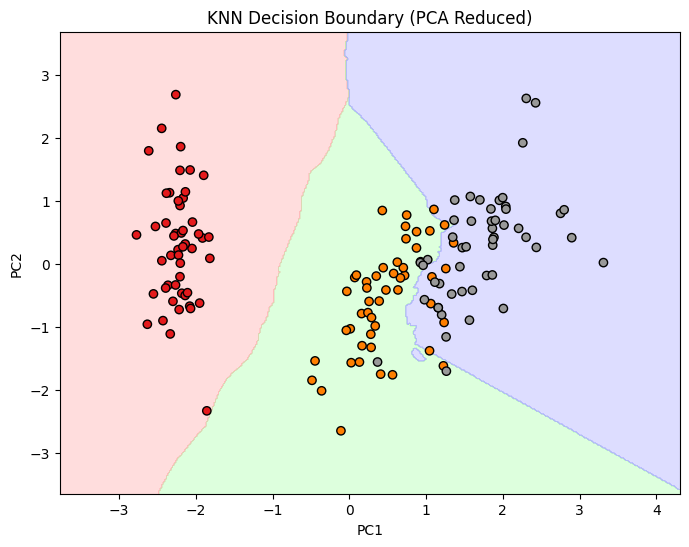

In [26]:
#47 Train a KNN Classifier and visualize the decision boundary.
from matplotlib.colors import ListedColormap

# Reduce data to 2D for visualization
X_2d = PCA(n_components=2).fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create meshgrid
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', cmap='Set1')
plt.title("KNN Decision Boundary (PCA Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


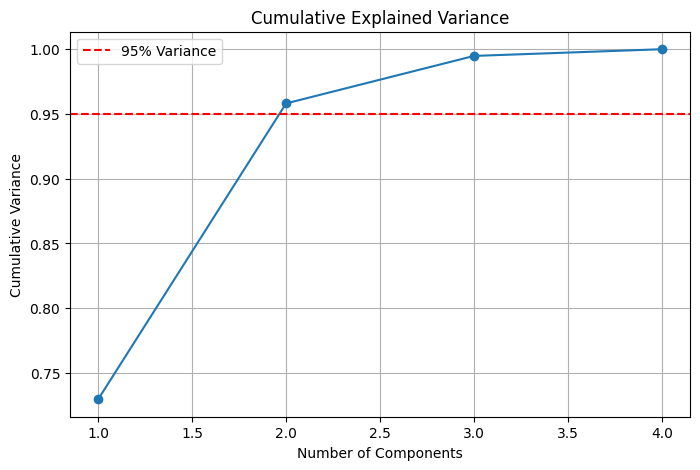

In [27]:
#48 Train a PCA model and analyze the effect of different numbers of components on data variance
pca = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.legend()
plt.grid(True)
plt.show()

